In [ ]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
from scipy.optimize import brute, fmin
from scipy.integrate import quad
import warnings
from scipy.fftpack import fft
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import rand, seed
from scipy.stats import norm

 ## **Step 1 : Collection of Financial Time Series**

## Team member A

Team member A (Shong Xian) is preparing the financial time series for equity category which is IBM. The time frame was scheduled from 1st January 2019 to 31st December 2022 that covered the whole process of covid. It will focus on the time series of the close price and identify the possible ways to deal with this fast-changing event.

In [ ]:
sheet_id = "1BVdVXGku41Im9cB5d8Th7r-V0MujVLTkG29FnzLZkNI"


# Construct the URL for downloading CSV from Google Sheets
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv"

# Read the CSV data into a pandas DataFrame
IBM_data = pd.read_csv(url)
IBM_data = pd.DataFrame(IBM_data)

In [ ]:
IBM_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/2/2019,107.084129,110.879539,106.778206,110.143402,84.681969,4434935
1,1/3/2019,109.493309,109.827919,107.734222,107.944550,82.991425,4546648
2,1/4/2019,109.856598,112.323135,109.407265,112.160614,86.232895,4683779
3,1/7/2019,112.332695,113.604210,111.539200,112.954109,86.842957,3923755
4,1/8/2019,114.397705,115.267685,113.747612,114.560226,88.077797,4982726


## Team member B


In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import pandas_datareader.data as web
import datetime
import pandas as pd
import numpy as np
#yfin.pdr_override()
sns.set()
sns.set(style="darkgrid")

In [ ]:
# The data used here was for AApl 500 for the last 5 years

start = datetime.date(2019,1,1)
end = datetime.date(2022,12,31)

#Loading data using pandas data reader
priceSPY = yf.download('SPY', start=start, end=end)['Adj Close']
priceSPY = pd.DataFrame(priceSPY)

#Calculating the log return and saving it in another dataframe
dfSPY = np.log(priceSPY) - np.log(priceSPY.shift(1))
dfSPY = dfSPY.iloc[1:, 0:]
priceSPY.head()

[*********************100%%**********************]  1 of 1 completed


,Adj Close
Date,
2019-01-02,229.104218
2019-01-03,223.637177
2019-01-04,231.128036
2019-01-07,232.950424
2019-01-08,235.139038


## Team member C


In [ ]:
import pandas as pd
import yfinance as yf


# Collecting Bitcoin price data
bitcoin = yf.download('BTC-USD', start='2019-01-01', end='2022-12-31')

# Display the first few rows of each data

bitcoin.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,3746.713379,3850.913818,3707.231201,3843.520020,3843.520020,4324200990
2019-01-02,3849.216309,3947.981201,3817.409424,3943.409424,3943.409424,5244856836
2019-01-03,3931.048584,3935.685059,3826.222900,3836.741211,3836.741211,4530215219
2019-01-04,3832.040039,3865.934570,3783.853760,3857.717529,3857.717529,4847965467
2019-01-05,3851.973877,3904.903076,3836.900146,3845.194580,3845.194580,5137609824


## **Step 2**

### Part (a) Visualizations of the Financial Time Series

## Team member A :   IBM Data Visualization

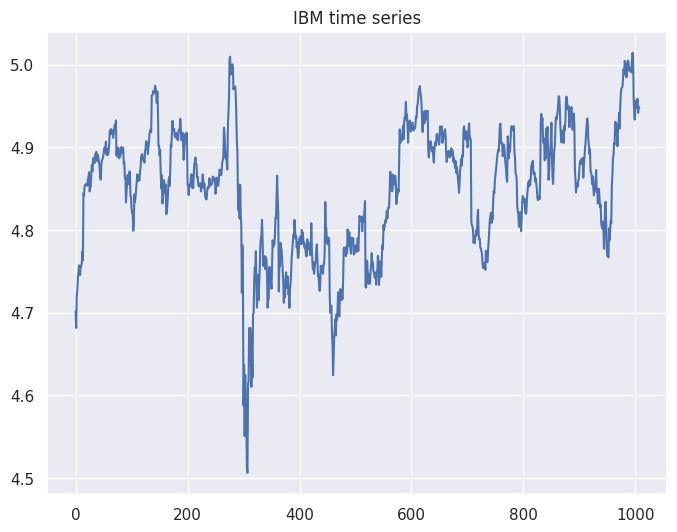

In [ ]:
YDatapd = IBM_data[["Close"]]
YDatapd = YDatapd.dropna()
YData = YDatapd.to_numpy()
YData = np.log(YData)
plt.plot(YData)
plt.title("IBM time series")

fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.show()

## Team member B : S&P 500 Data Visualization

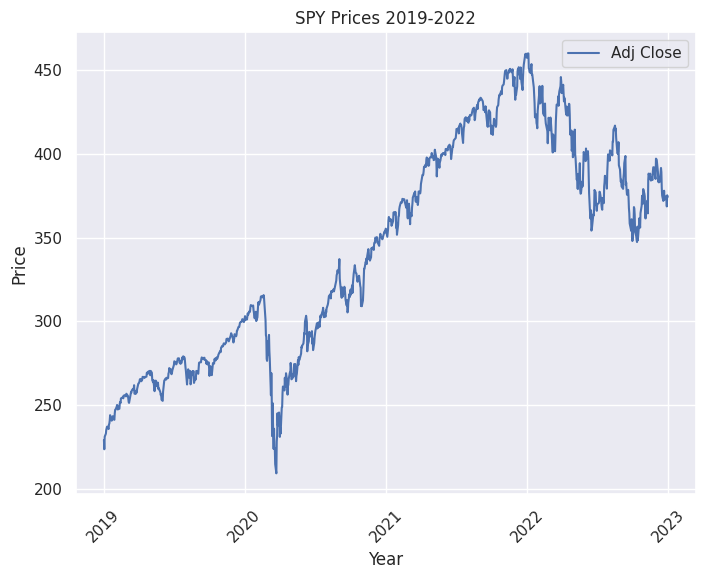

In [ ]:
sns.lineplot(data=priceSPY)
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xticks(rotation=45)
plt.title("SPY Prices 2019-2022")
plt.ylabel("Price")
plt.xlabel("Year")

fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.show()

The chart showing above describes the frequency of price changes. Y-axis indicates the range of volatile from 4.5 to 5 over the period during covid-19. X-axis indicates the number of days that ranges from 01 January 2019 to 31 December 2022. A steep decrease appeared around 300 days. This decrease indicates the outbreak of covid-19 which close to year end of 2019.

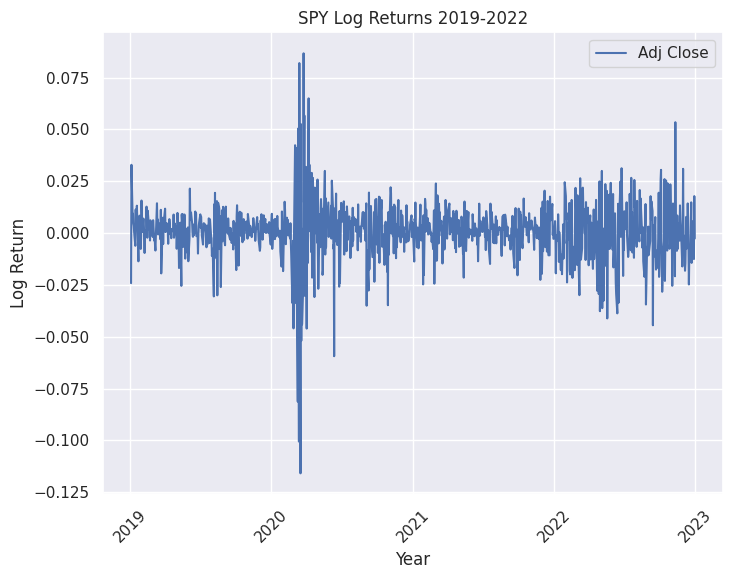

In [ ]:

sns.lineplot(data=dfSPY)
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xticks(rotation=45)
plt.title("SPY Log Returns 2019-2022")
plt.ylabel("Log Return")
plt.xlabel("Year")

fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.show()

In [ ]:
!pip install hmmlearn

[*********************100%%**********************]  1 of 1 completed
<ipython-input-94-cda8fd15260e>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['State'] = hidden_states


        Adj Close   Returns
State                      
0      347.239536  0.001400
1      327.752308 -0.022956
2      290.775506 -0.005437


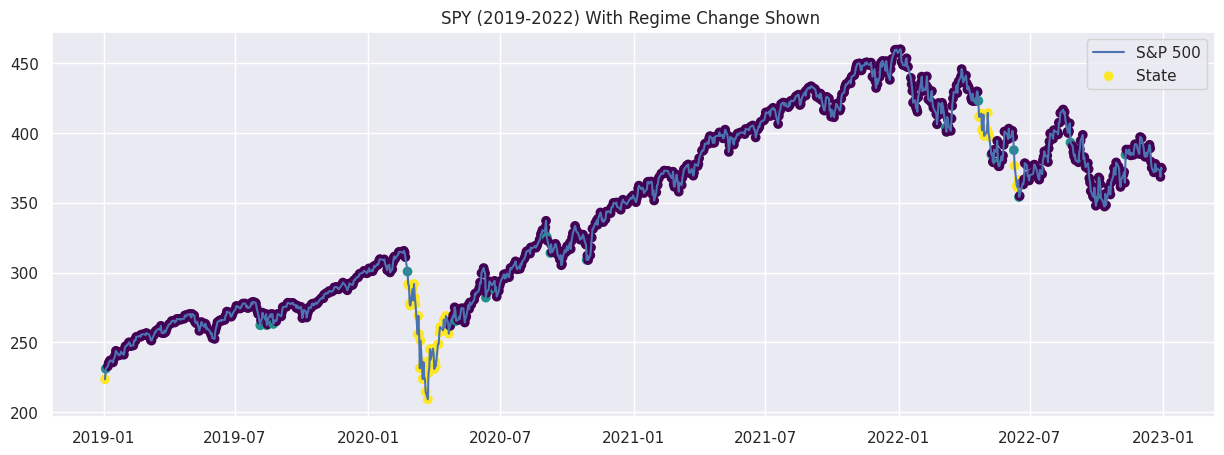

In [ ]:
import numpy as np
import pandas as pd
from hmmlearn import hmm
import yfinance as yf

# Download S&P 500 data
#data = yf.download('SPY', start='2019-01-01', end='2022-12-31')
#data['Returns'] = data['Adj Close'].pct_change().dropna()

start = datetime.date(2019,1,1)
end = datetime.date(2022,12,31)

#Loading data using pandas data reader
data = yf.download('SPY', start=start, end=end)['Adj Close']
data = pd.DataFrame(data)

#Calculating the log return and saving it in another dataframe
data['Returns'] = np.log(data) - np.log(data.shift(1))


# Prepare the data
returns = data['Returns'].values.reshape(-1, 1)[1:]

# Initialize HMM
model = hmm.GaussianHMM(n_components=3, covariance_type="diag", n_iter=100)
model.fit(returns)

# Predict hidden states
hidden_states = model.predict(returns)

# Add the hidden states to the data
data = data.dropna()
data['State'] = hidden_states

# Analyze the states
print(data.groupby('State').mean())

# Visualize the results
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(data.index, data['Adj Close'], label='S&P 500')
plt.scatter(data.index, data['Adj Close'], c=data['State'], cmap='viridis', label='State')
plt.title("SPY (2019-2022) With Regime Change Shown ")
plt.legend()
plt.show()


In [ ]:
print("Transition matrix")
print(model.transmat_)
print("Means and variances of each hidden state")
print("Means: ", model.means_)
print("Variances: ", model.covars_)


Transition matrix
[[3.12323253e-01 7.97078668e-02 6.07968881e-01]
 [9.45506005e-05 9.89203857e-01 1.07015928e-02]
 [8.28992840e-01 1.57512232e-01 1.34949278e-02]]
Means and variances of each hidden state
Means:  [[ 0.00734461]
 [ 0.00108024]
 [-0.02046787]]
Variances:  [[[0.00127338]]

 [[0.00010627]]

 [[0.0011817 ]]]


In [ ]:
# Estimation of model with changes in volatility regimes

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm

# Estimation of model with changes in volatility regimes
# Build function that performs the E step
# Likelihood of an observation


def likelihood(xi_prob, mu, sigma, y):
    phi = norm.pdf((y - mu) / sigma)
    y_like = np.dot(xi_prob, phi)

    return y_like


# Hamilton filtering
def forward_alg(pi_hat0, N, T, P, mu, sigma, Y):
    xi_prob_t = np.zeros((T, N))
    xi_prob_t1 = np.zeros((T, N))

    # Case t=1
    y_like = likelihood(pi_hat0, mu, sigma, Y[0])
    for ss in range(0, N):
        phi = np.zeros((N))
        for ss2 in range(0, N):
            phi[ss2] = norm.pdf((Y[0] - mu[ss2]) / sigma[ss2])
    xi_prob_t[0, :] = np.multiply(pi_hat0, phi) / y_like
    for ss in range(0, N):
        xi_prob_t1[0, ss] = np.dot(P[:, ss], xi_prob_t[0, :])

    for tt in range(1, T):
        y_like = likelihood(xi_prob_t1[tt - 1, :], mu, sigma, Y[tt])
        for ss in range(0, N):
            phi = np.zeros((N))
            for ss2 in range(0, N):
                phi[ss2] = norm.pdf((Y[tt] - mu[ss2]) / sigma[ss2])
        xi_prob_t[tt, :] = np.multiply(xi_prob_t1[tt - 1, :], phi) / y_like
        for ss in range(0, N):
            xi_prob_t1[tt, ss] = np.dot(P[:, ss], xi_prob_t[tt, :])

    return xi_prob_t, xi_prob_t1


# Kim filtering
def backward_alg(xi_prob_t, xi_prob_t1, N, T, P, mu, sigma, Y):
    xi_prob_T = np.zeros((T, N))
    xi_prob_T[T - 1, :] = xi_prob_t[T - 1, :]

    for tt in range(T - 2, -1, -1):
        xi_T_xi = np.divide(xi_prob_T[tt + 1, :], xi_prob_t1[tt, :])
        for ss in range(0, N):
            xi_prob_T[tt, ss] = xi_prob_t[tt, ss] * np.dot(P[ss, :], xi_T_xi)

    return xi_prob_T  # , xi_prob_T1


def M_step_func(xi_prob, P, N, T, Y):  #
    mu_hat = np.zeros((N))
    sigma_hat = np.zeros((N))
    P_hat = np.zeros((N, N))
    pi_hat = np.zeros((N))

    for ss in range(0, N):
        xi_y = np.dot(xi_prob[:, ss], Y)
        mu_hat[ss] = xi_y / np.sum(xi_prob[:, ss])

        xi_y_mu2 = np.dot(xi_prob[:, ss], (Y - mu_hat[ss]) ** 2)
        sigma_hat[ss] = (xi_y_mu2 / np.sum(xi_prob[:, ss])) ** 0.5

        for ss2 in range(0, N):
            P_hat[ss, ss2] = np.sum(P[ss, ss2, 1:]) / np.sum(
                P[ss, :, 1:]
            )  # /np.sum(xi_prob[0:T-1,ss]) #np.sum(P[ss,:,1:T])
            # print( np.sum(xi_prob[0:T-1,ss]), np.sum(P[ss,:,1:T]))

        pi_hat[ss] = xi_prob[0, ss]

    return mu_hat, sigma_hat, P_hat, pi_hat

[2. 2.] [0.1 0.2] [[0.75 0.25]
 [0.3  0.7 ]] [0.54545455 0.45454545]


<ipython-input-78-91da0af7ba2f>:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  phi[ss2] = norm.pdf((Y[0] - mu[ss2]) / sigma[ss2])
<ipython-input-78-91da0af7ba2f>:40: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  phi[ss2] = norm.pdf((Y[tt] - mu[ss2]) / sigma[ss2])


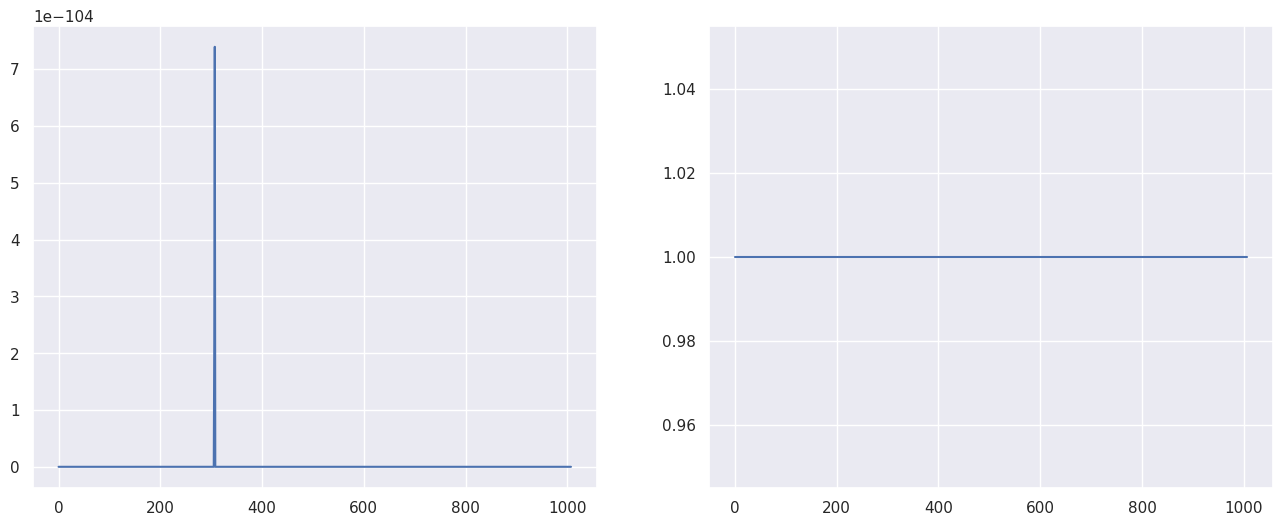


0 8.396641343462615
[4.50796544 4.8498628 ] [0.00279446 0.07826506] [[1.1725487e-103 1.0000000e+000]
 [9.4939233e-107 1.0000000e+000]] [5.62208093e-120 1.00000000e+000]


<ipython-input-78-91da0af7ba2f>:69: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mu_hat[ss] = xi_y / np.sum(xi_prob[:, ss])
<ipython-input-78-91da0af7ba2f>:72: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sigma_hat[ss] = (xi_y_mu2 / np.sum(xi_prob[:, ss])) ** 0.5


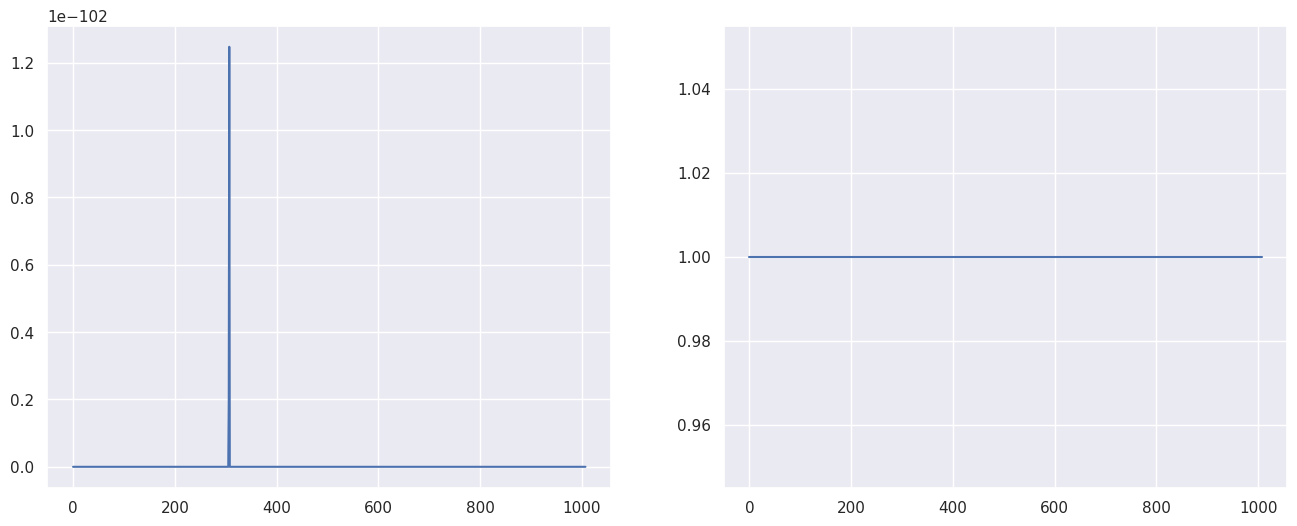


1 0.191777062624711
[4.50737024 4.8498628 ] [0.00223937 0.07826506] [[2.10457448e-100 1.00000000e+000]
 [1.43485520e-105 1.00000000e+000]] [0. 1.]



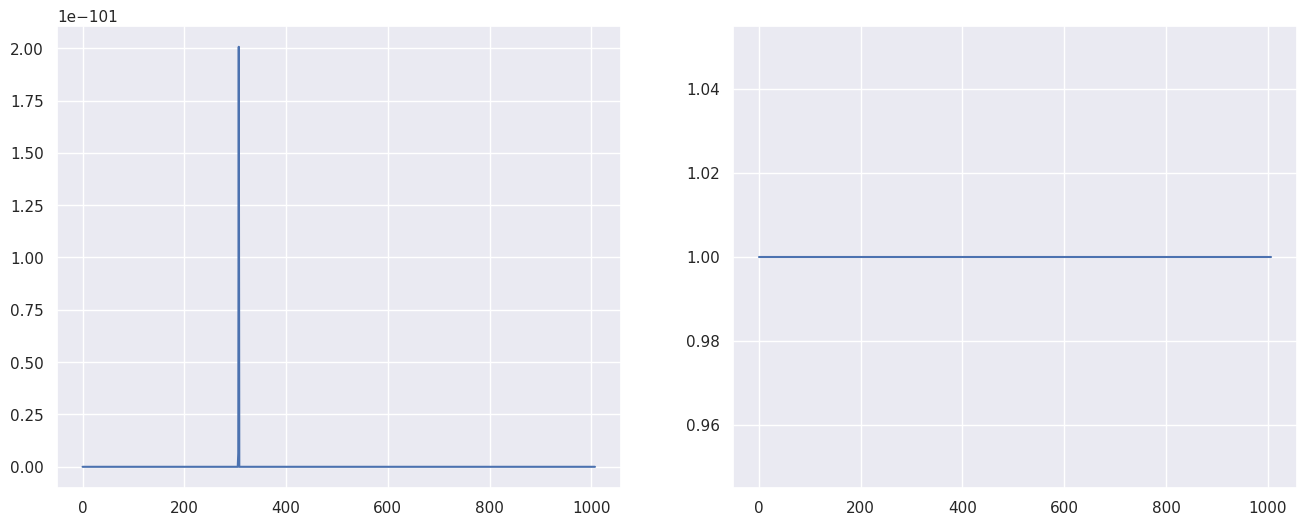


2 0.4744202323940922
[4.50668145 4.8498628 ] [0.00112952 0.07826506] [[9.11289877e-098 1.00000000e+000]
 [2.05631151e-104 1.00000000e+000]] [0. 1.]



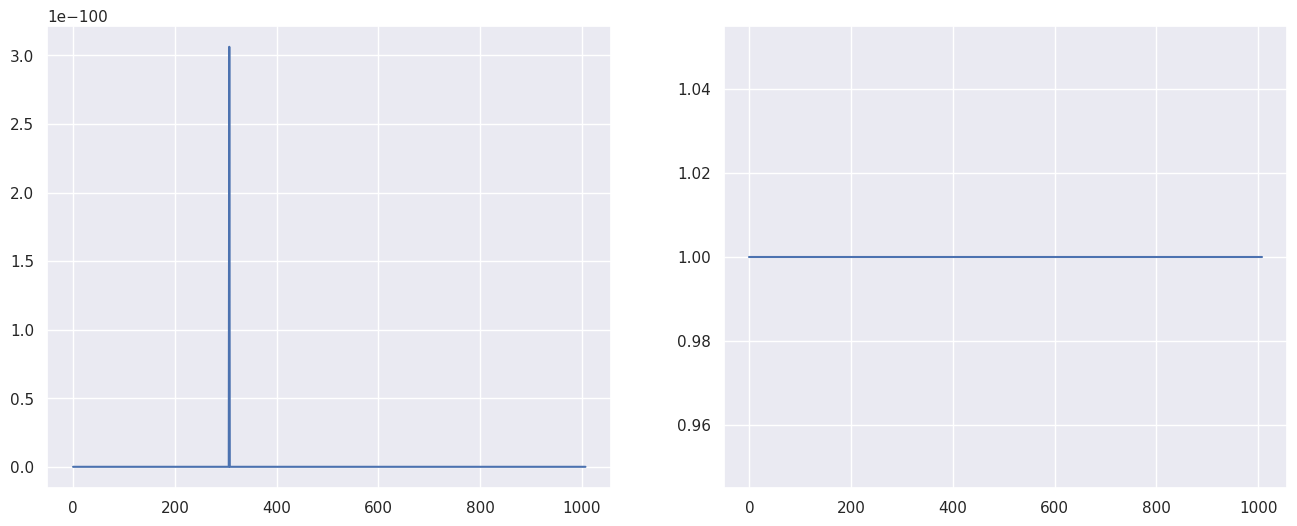


3 0.9168836578928075
[4.50647954 4.8498628 ] [2.19356505e-06 7.82650631e-02] [[1.53607952e-100 1.00000000e+000]
 [3.04175891e-103 1.00000000e+000]] [0. 1.]



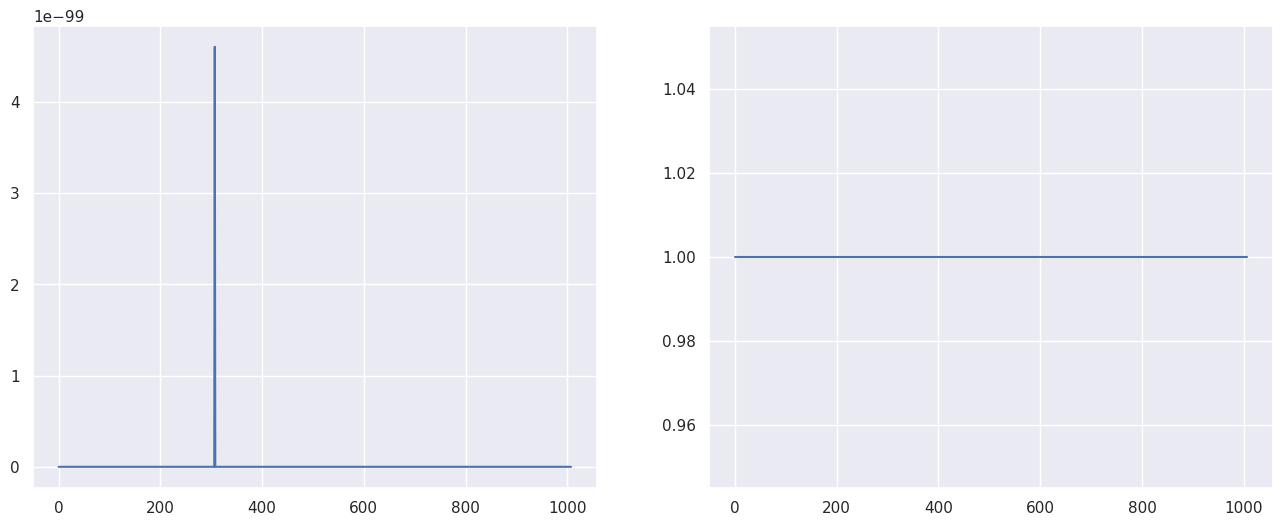


4 0.02146480596989623
[4.50647954 4.8498628 ] [0.         0.07826506] [[0.00000000e+000 1.00000000e+000]
 [4.57192332e-102 1.00000000e+000]] [0. 1.]


<ipython-input-78-91da0af7ba2f>:14: RuntimeWarning: divide by zero encountered in divide
  phi = norm.pdf((y - mu) / sigma)
<ipython-input-78-91da0af7ba2f>:30: RuntimeWarning: divide by zero encountered in divide
  phi[ss2] = norm.pdf((Y[0] - mu[ss2]) / sigma[ss2])
<ipython-input-78-91da0af7ba2f>:40: RuntimeWarning: divide by zero encountered in divide
  phi[ss2] = norm.pdf((Y[tt] - mu[ss2]) / sigma[ss2])
<ipython-input-78-91da0af7ba2f>:14: RuntimeWarning: invalid value encountered in divide
  phi = norm.pdf((y - mu) / sigma)
<ipython-input-78-91da0af7ba2f>:40: RuntimeWarning: invalid value encountered in divide
  phi[ss2] = norm.pdf((Y[tt] - mu[ss2]) / sigma[ss2])


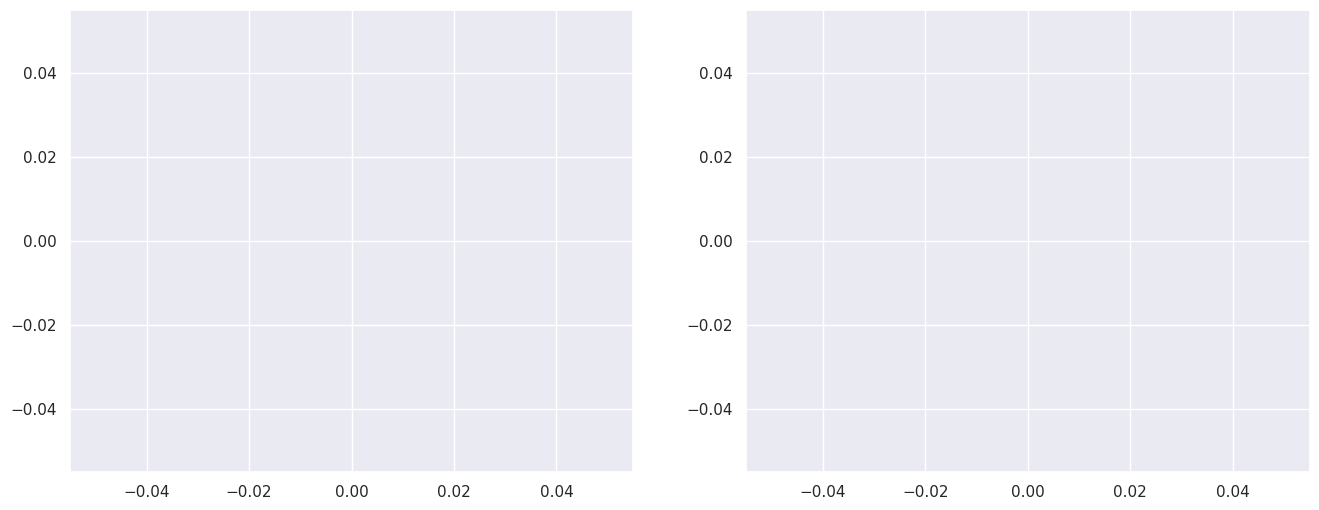


5 nan
[nan nan] [nan nan] [[nan nan]
 [nan nan]] [nan nan]


In [ ]:
# Initialize parameters
T = len(YData)
N = 2

# SET INITIAL GUESSES

mu_hat0 = [2, 2] * np.ones((N))
sigma_hat0 = [0.1, 0.2] * np.ones((N))
P_hat0 = np.zeros((N, N))

P_hat0[0, 0] = 0.75
P_hat0[0, 1] = 1 - P_hat0[0, 0]
P_hat0[1, 1] = 0.7
P_hat0[1, 0] = 1 - P_hat0[1, 1]

pi_hat0 = [0.5, 0.5] * np.ones((N))
for t in range(1, 100):
    pi_hat0 = np.dot(P_hat0.T, pi_hat0)

# Determine maximum number of iterations until convergence and convergence tolerance
itemax = 200
itetol = 1e-2

for ite in range(0, itemax):
    print(mu_hat0, sigma_hat0, P_hat0, pi_hat0)

    # E-step
    xi_prob_t, xi_prob_t1 = forward_alg(
        pi_hat0, N, T, P_hat0, mu_hat0, sigma_hat0, YData
    )
    xi_prob_T = backward_alg(
        xi_prob_t, xi_prob_t1, N, T, P_hat0, mu_hat0, sigma_hat0, YData
    )

    print("")
    plt.subplot(1, 2, 1)
    plt.plot(xi_prob_T[:, 0])
    plt.subplot(1, 2, 2)
    plt.plot(xi_prob_T[:, 1])
    fig = plt.gcf()
    fig.set_size_inches(16, 6)
    plt.show()
    print("")

    # Compute Pr(s_t+1 = j, s_t = i)
    P_hat_T = np.zeros((N, N, T))
    for tt in range(1, T):
        for ss in range(0, N):
            for ss2 in range(0, N):
                P_hat_T[ss, ss2, tt] = (
                    P_hat0[ss, ss2]
                    * xi_prob_t[tt - 1, ss]
                    * xi_prob_T[tt, ss2]
                    / xi_prob_t1[tt - 1, ss2]
                )
    # M-step
    mu_hat1, sigma_hat1, P_hat1, pi_hat1 = M_step_func(xi_prob_T, P_hat_T, N, T, YData)

    diff = np.zeros((4))
    diff[0] = np.sum(np.absolute(mu_hat1 - mu_hat0)) / (np.min(mu_hat0) + itetol * 1e-2)
    diff[1] = np.sum(np.absolute(sigma_hat1 - sigma_hat0)) / (
        np.min(sigma_hat0) + itetol * 1e-2
    )
    diff[2] = np.sum(np.absolute(np.subtract(P_hat1, P_hat0))) / (
        np.min(P_hat0) + itetol * 1e-2
    )
    diff[3] = np.sum(np.absolute(pi_hat1 - pi_hat0)) / (np.min(pi_hat0) + itetol * 1e-2)

    print(ite, np.max(diff))

    if np.max(diff) > itetol:
        mu_hat0, sigma_hat0, P_hat0, pi_hat0 = mu_hat1, sigma_hat1, P_hat1, pi_hat1
    else:
        print(mu_hat1, sigma_hat1, P_hat1, pi_hat1)
        break

## Team member C : Bitcoin Data Visualization

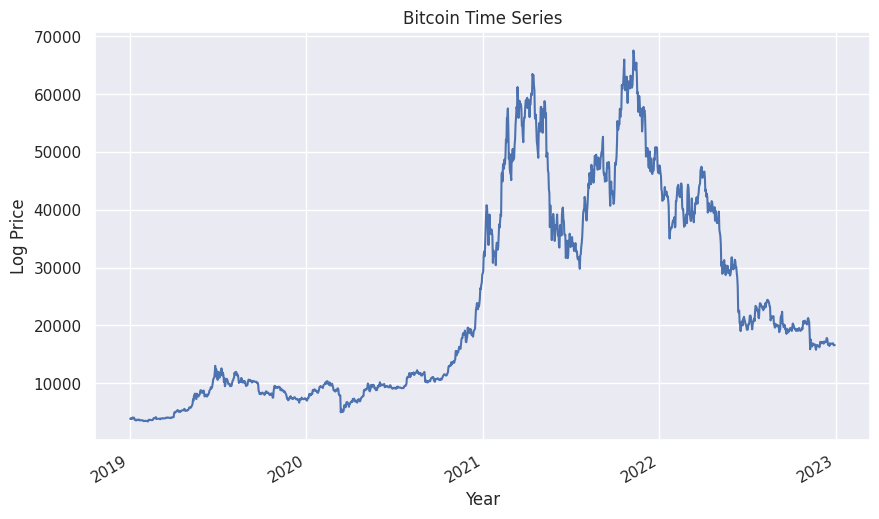

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import yfinance as yf

# Extract the "Close" column and drop any NaN values
bitcoin_data = bitcoin[["Close"]]
bitcoin_data = bitcoin_data.dropna()

# Convert to numpy array and take the log of the values
bit_Data = bitcoin_data.to_numpy()
bit_Data_log = np.log(bit_Data).flatten()


# Calculate log returns
bit_log_returns = np.diff(bit_Data_log)


# Plot the log-transformed time series
plt.figure(figsize=(10, 6))
plt.plot(bitcoin_data.index, bit_Data)
plt.title("Bitcoin Time Series")
plt.xlabel('Year')
plt.ylabel('Log Price')

# Format the x-axis to show years
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Rotate and align the tick labels
plt.gcf().autofmt_xdate()

plt.show()


### Step 2 part (b)

Regime change time series for IBM data

In [ ]:
YDatapd = IBM_data[["Close"]]
YDatapd = YDatapd.dropna()
YData = YDatapd.to_numpy()
YData = np.log(YData)

In [ ]:
# Estimation of model with changes in volatility regimes

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm

# Estimation of model with changes in volatility regimes
# Build function that performs the E step
# Likelihood of an observation


def likelihood(xi_prob, mu, sigma, y):
    phi = norm.pdf((y - mu) / sigma)
    y_like = np.dot(xi_prob, phi)

    return y_like


# Hamilton filtering
def forward_alg(pi_hat0, N, T, P, mu, sigma, Y):
    xi_prob_t = np.zeros((T, N))
    xi_prob_t1 = np.zeros((T, N))

    # Case t=1
    y_like = likelihood(pi_hat0, mu, sigma, Y[0])
    for ss in range(0, N):
        phi = np.zeros((N))
        for ss2 in range(0, N):
            phi[ss2] = norm.pdf((Y[0] - mu[ss2]) / sigma[ss2])
    xi_prob_t[0, :] = np.multiply(pi_hat0, phi) / y_like
    for ss in range(0, N):
        xi_prob_t1[0, ss] = np.dot(P[:, ss], xi_prob_t[0, :])

    for tt in range(1, T):
        y_like = likelihood(xi_prob_t1[tt - 1, :], mu, sigma, Y[tt])
        for ss in range(0, N):
            phi = np.zeros((N))
            for ss2 in range(0, N):
                phi[ss2] = norm.pdf((Y[tt] - mu[ss2]) / sigma[ss2])
        xi_prob_t[tt, :] = np.multiply(xi_prob_t1[tt - 1, :], phi) / y_like
        for ss in range(0, N):
            xi_prob_t1[tt, ss] = np.dot(P[:, ss], xi_prob_t[tt, :])

    return xi_prob_t, xi_prob_t1


# Kim filtering
def backward_alg(xi_prob_t, xi_prob_t1, N, T, P, mu, sigma, Y):
    xi_prob_T = np.zeros((T, N))
    xi_prob_T[T - 1, :] = xi_prob_t[T - 1, :]

    for tt in range(T - 2, -1, -1):
        xi_T_xi = np.divide(xi_prob_T[tt + 1, :], xi_prob_t1[tt, :])
        for ss in range(0, N):
            xi_prob_T[tt, ss] = xi_prob_t[tt, ss] * np.dot(P[ss, :], xi_T_xi)

    return xi_prob_T  # , xi_prob_T1


def M_step_func(xi_prob, P, N, T, Y):  #
    mu_hat = np.zeros((N))
    sigma_hat = np.zeros((N))
    P_hat = np.zeros((N, N))
    pi_hat = np.zeros((N))

    for ss in range(0, N):
        xi_y = np.dot(xi_prob[:, ss], Y)
        mu_hat[ss] = xi_y / np.sum(xi_prob[:, ss])

        xi_y_mu2 = np.dot(xi_prob[:, ss], (Y - mu_hat[ss]) ** 2)
        sigma_hat[ss] = (xi_y_mu2 / np.sum(xi_prob[:, ss])) ** 0.5

        for ss2 in range(0, N):
            P_hat[ss, ss2] = np.sum(P[ss, ss2, 1:]) / np.sum(
                P[ss, :, 1:]
            )  # /np.sum(xi_prob[0:T-1,ss]) #np.sum(P[ss,:,1:T])
            # print( np.sum(xi_prob[0:T-1,ss]), np.sum(P[ss,:,1:T]))

        pi_hat[ss] = xi_prob[0, ss]

    return mu_hat, sigma_hat, P_hat, pi_hat

Markov-regime switching model (state 2)

[2. 4.] [0.1 0.1] [[0.75 0.25]
 [0.3  0.7 ]] [0.54545455 0.45454545]


<ipython-input-17-91da0af7ba2f>:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  phi[ss2] = norm.pdf((Y[0] - mu[ss2]) / sigma[ss2])
<ipython-input-17-91da0af7ba2f>:40: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  phi[ss2] = norm.pdf((Y[tt] - mu[ss2]) / sigma[ss2])


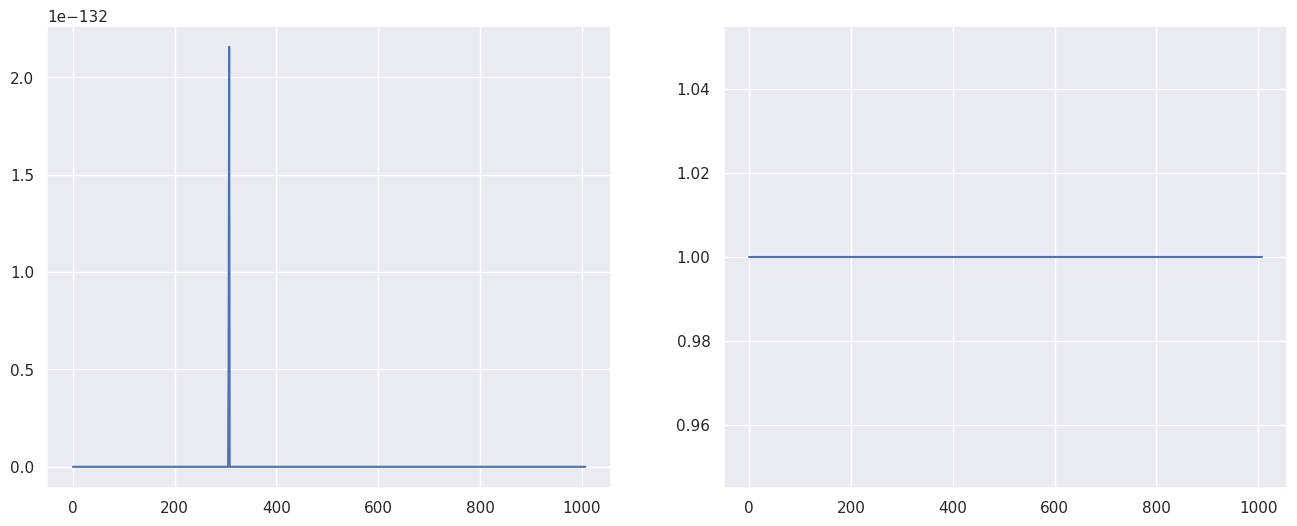


0 8.396641343462617
[4.50787664 4.8498628 ] [0.002714   0.07826506] [[3.22174458e-132 1.00000000e+000]
 [2.72280802e-135 1.00000000e+000]] [6.56168042e-149 1.00000000e+000]


<ipython-input-17-91da0af7ba2f>:69: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mu_hat[ss] = xi_y / np.sum(xi_prob[:, ss])
<ipython-input-17-91da0af7ba2f>:72: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sigma_hat[ss] = (xi_y_mu2 / np.sum(xi_prob[:, ss])) ** 0.5


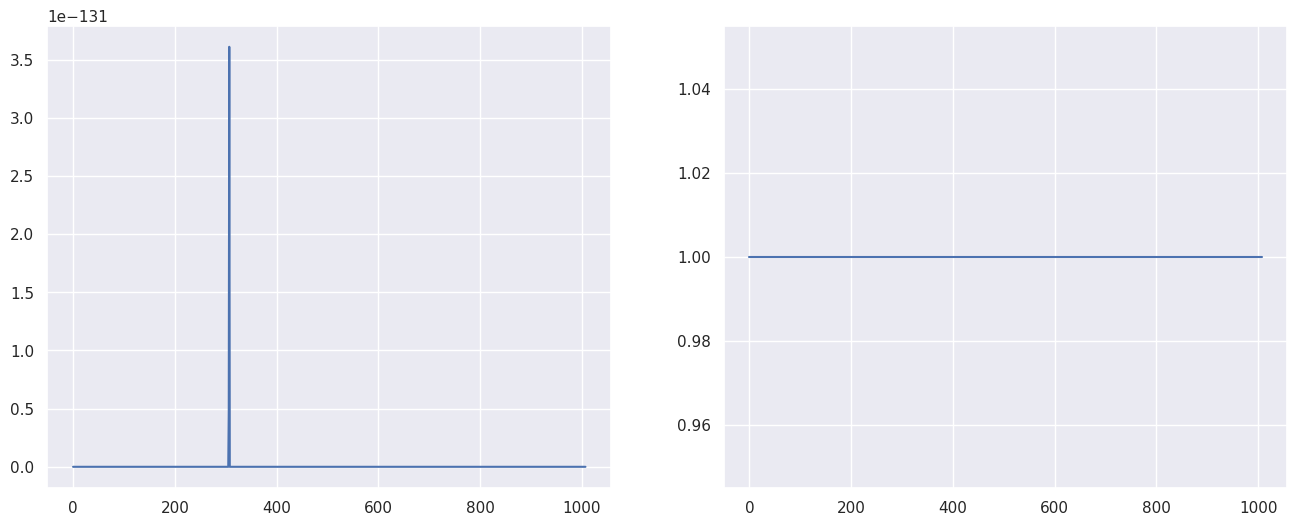


1 0.2169317026312073
[4.5072489 4.8498628] [0.00210355 0.07826506] [[0.00000000e+000 1.00000000e+000]
 [4.06416969e-134 1.00000000e+000]] [0. 1.]



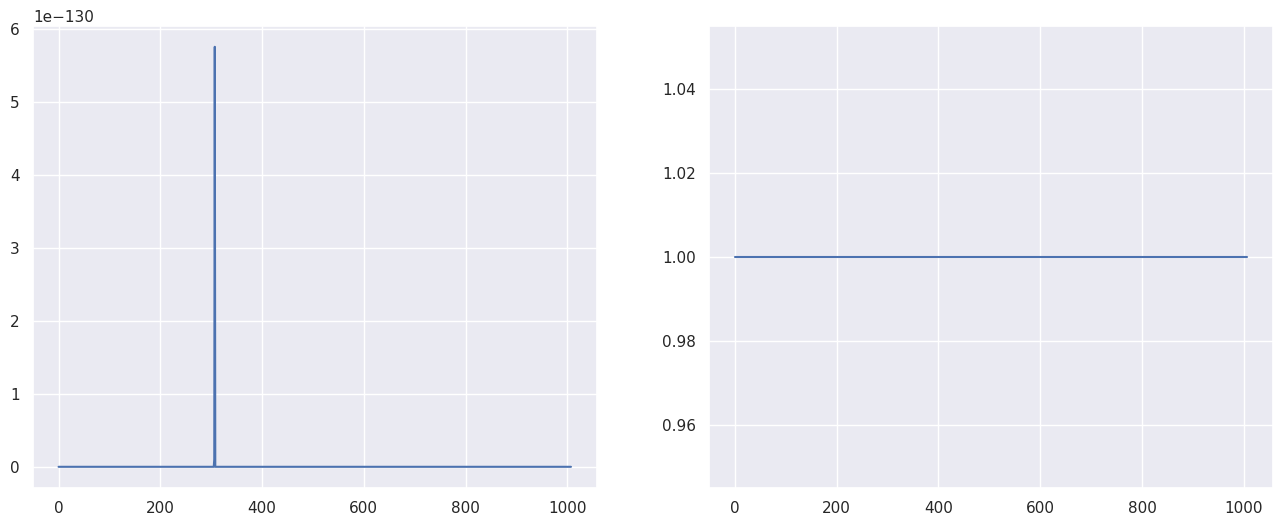


2 0.5675572048054361
[4.50659308 4.8498628 ] [0.00085291 0.07826506] [[0.0000000e+000 1.0000000e+000]
 [5.8147005e-133 1.0000000e+000]] [0. 1.]



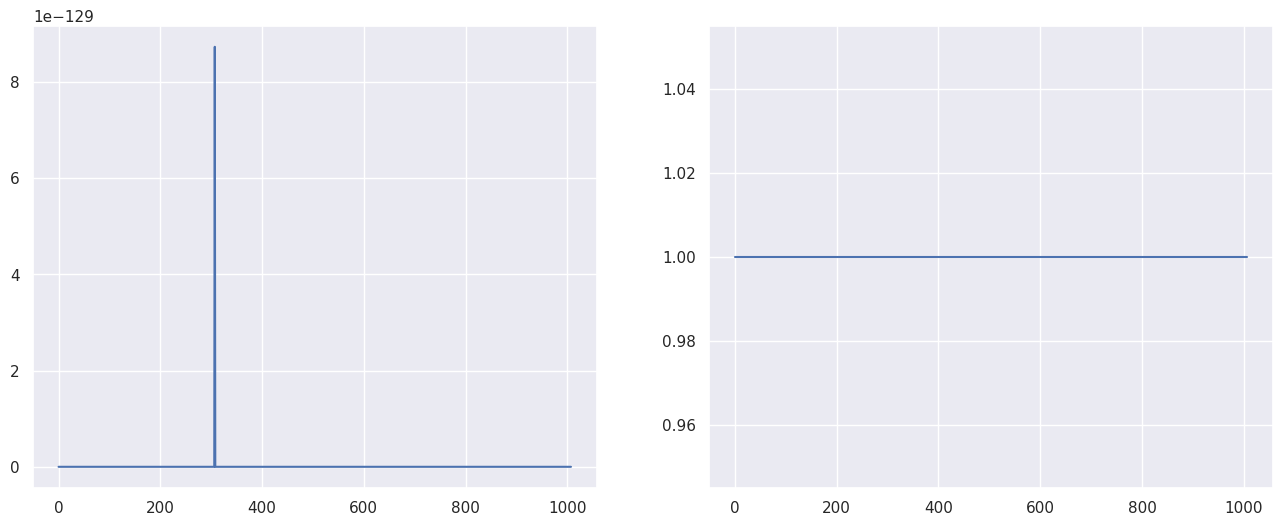


3 0.895054057791783
[4.50647954 4.8498628 ] [4.07647500e-09 7.82650631e-02] [[0.00000000e+000 1.00000000e+000]
 [8.66270972e-132 1.00000000e+000]] [0. 1.]



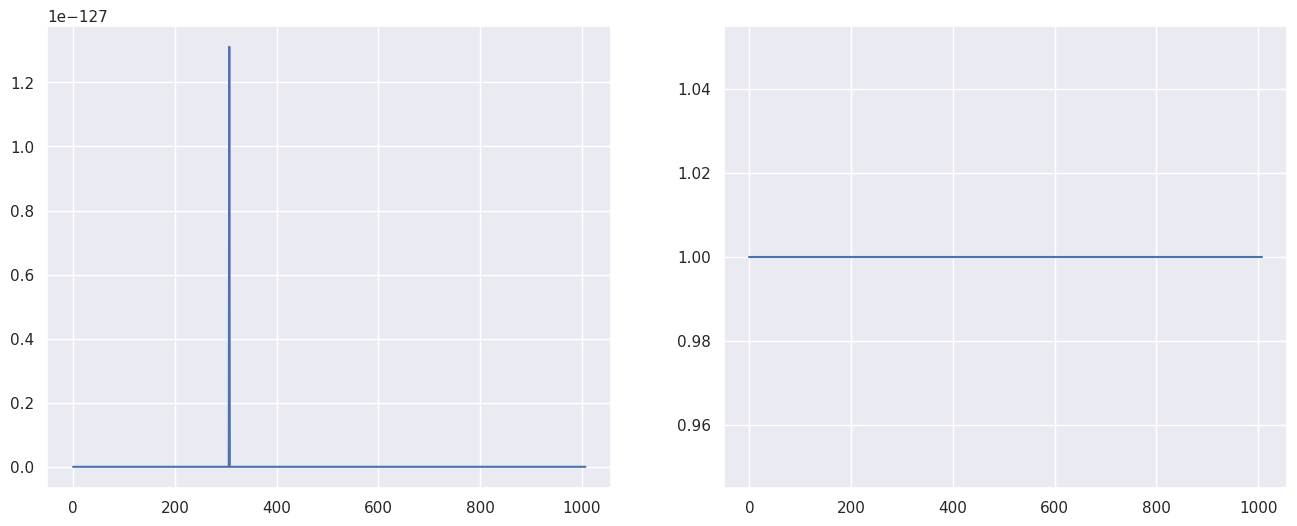


4 4.0763088344285916e-05
[4.50647954 4.8498628 ] [0.         0.07826506] [[0.00000000e+000 1.00000000e+000]
 [1.30205082e-130 1.00000000e+000]] [0. 1.]


In [ ]:
# Initialize parameters
T = len(YData)
N = 2

# SET INITIAL GUESSES

mu_hat0 = [2, 4] * np.ones((N))
sigma_hat0 = [0.1, 0.1] * np.ones((N))
P_hat0 = np.zeros((N, N))

P_hat0[0, 0] = 0.75
P_hat0[0, 1] = 1 - P_hat0[0, 0]
P_hat0[1, 1] = 0.7
P_hat0[1, 0] = 1 - P_hat0[1, 1]

pi_hat0 = [0.5, 0.5] * np.ones((N))
for t in range(1, 100):
    pi_hat0 = np.dot(P_hat0.T, pi_hat0)

# Determine maximum number of iterations until convergence and convergence tolerance
itemax = 200
itetol = 1e-2

for ite in range(0, itemax):
    print(mu_hat0, sigma_hat0, P_hat0, pi_hat0)

    # E-step
    xi_prob_t, xi_prob_t1 = forward_alg(
        pi_hat0, N, T, P_hat0, mu_hat0, sigma_hat0, YData
    )
    xi_prob_T = backward_alg(
        xi_prob_t, xi_prob_t1, N, T, P_hat0, mu_hat0, sigma_hat0, YData
    )

    print("")
    plt.subplot(1, 2, 1)
    plt.plot(xi_prob_T[:, 0])
    plt.subplot(1, 2, 2)
    plt.plot(xi_prob_T[:, 1])
    fig = plt.gcf()
    fig.set_size_inches(16, 6)
    plt.show()
    print("")

    # Compute Pr(s_t+1 = j, s_t = i)
    P_hat_T = np.zeros((N, N, T))
    for tt in range(1, T):
        for ss in range(0, N):
            for ss2 in range(0, N):
                P_hat_T[ss, ss2, tt] = (
                    P_hat0[ss, ss2]
                    * xi_prob_t[tt - 1, ss]
                    * xi_prob_T[tt, ss2]
                    / xi_prob_t1[tt - 1, ss2]
                )
    # M-step
    mu_hat1, sigma_hat1, P_hat1, pi_hat1 = M_step_func(xi_prob_T, P_hat_T, N, T, YData)

    diff = np.zeros((4))
    diff[0] = np.sum(np.absolute(mu_hat1 - mu_hat0)) / (np.min(mu_hat0) + itetol * 1e-2)
    diff[1] = np.sum(np.absolute(sigma_hat1 - sigma_hat0)) / (
        np.min(sigma_hat0) + itetol * 1e-2
    )
    diff[2] = np.sum(np.absolute(np.subtract(P_hat1, P_hat0))) / (
        np.min(P_hat0) + itetol * 1e-2
    )
    diff[3] = np.sum(np.absolute(pi_hat1 - pi_hat0)) / (np.min(pi_hat0) + itetol * 1e-2)

    print(ite, np.max(diff))

    if np.max(diff) > itetol:
        mu_hat0, sigma_hat0, P_hat0, pi_hat0 = mu_hat1, sigma_hat1, P_hat1, pi_hat1
    else:
        print(mu_hat1, sigma_hat1, P_hat1, pi_hat1)
        break

It assumes the number of states is equal to 2. The initial guess of the expected values (means) are 2 and 4 were set to each states and times with number of states. The variance of the time series in each state is set at 0.1 in each state. The state transition probabilities were based on the number states, 75% probability is set in state 0.
25% of probability is set from state 0 to state 1. 70% of probability transition state in state 1 and 30% probability from state 1 to 0. Since the number of states is 2, the vector of initial state probabilities for Markov regime-switching model is set to 0.5.


### Number states of 3

[2 4 6] [0.1 0.1 0.1] [[0.75 0.15 0.1 ]
 [0.2  0.7  0.1 ]
 [0.1  0.1  0.8 ]] [0.36666667 0.29333333 0.33      ]


<ipython-input-17-91da0af7ba2f>:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  phi[ss2] = norm.pdf((Y[0] - mu[ss2]) / sigma[ss2])
<ipython-input-17-91da0af7ba2f>:40: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  phi[ss2] = norm.pdf((Y[tt] - mu[ss2]) / sigma[ss2])


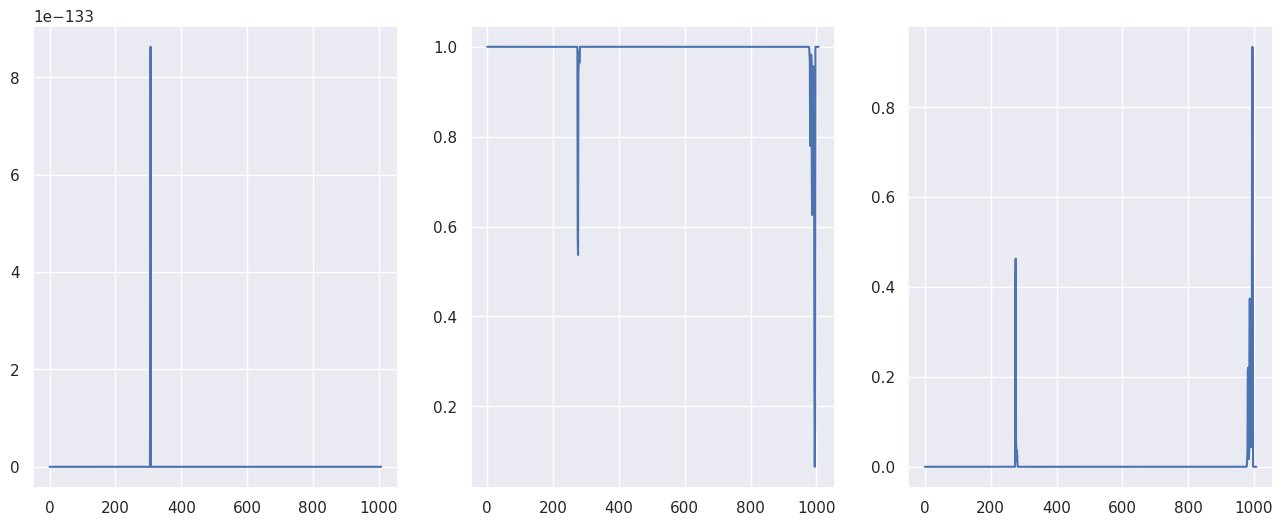

<ipython-input-17-91da0af7ba2f>:69: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mu_hat[ss] = xi_y / np.sum(xi_prob[:, ss])
<ipython-input-17-91da0af7ba2f>:72: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sigma_hat[ss] = (xi_y_mu2 / np.sum(xi_prob[:, ss])) ** 0.5


0 28.764556303264268
[4.50787664 4.8489801  5.00566346] [0.002714   0.07759876 0.00666315] [[3.22174458e-132 1.00000000e+000 2.05149470e-035]
 [1.09529989e-135 9.97777500e-001 2.22249999e-003]
 [1.30901540e-165 3.91888543e-001 6.08111457e-001]] [4.10105026e-149 1.00000000e+000 2.01034161e-027]


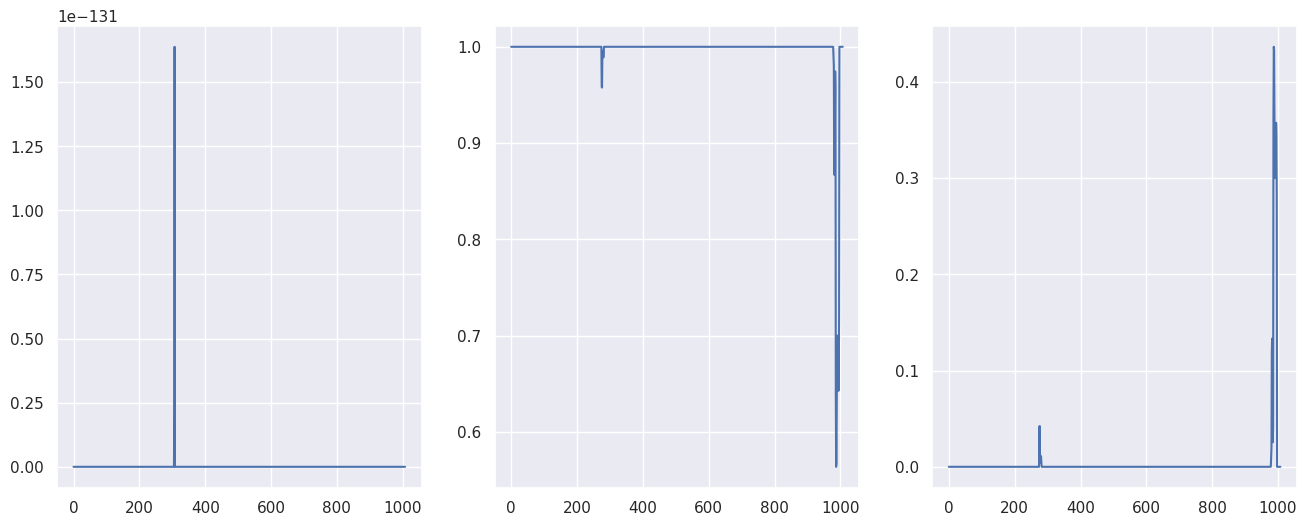

1 4362.991072457356
[4.50724531 4.8492033  5.00067404] [0.0020993  0.07779514 0.00721662] [[0.00000000e+000 1.00000000e+000 0.00000000e+000]
 [1.85056999e-134 9.99233104e-001 7.66895969e-004]
 [0.00000000e+000 1.75194593e-001 8.24805407e-001]] [0. 1. 0.]


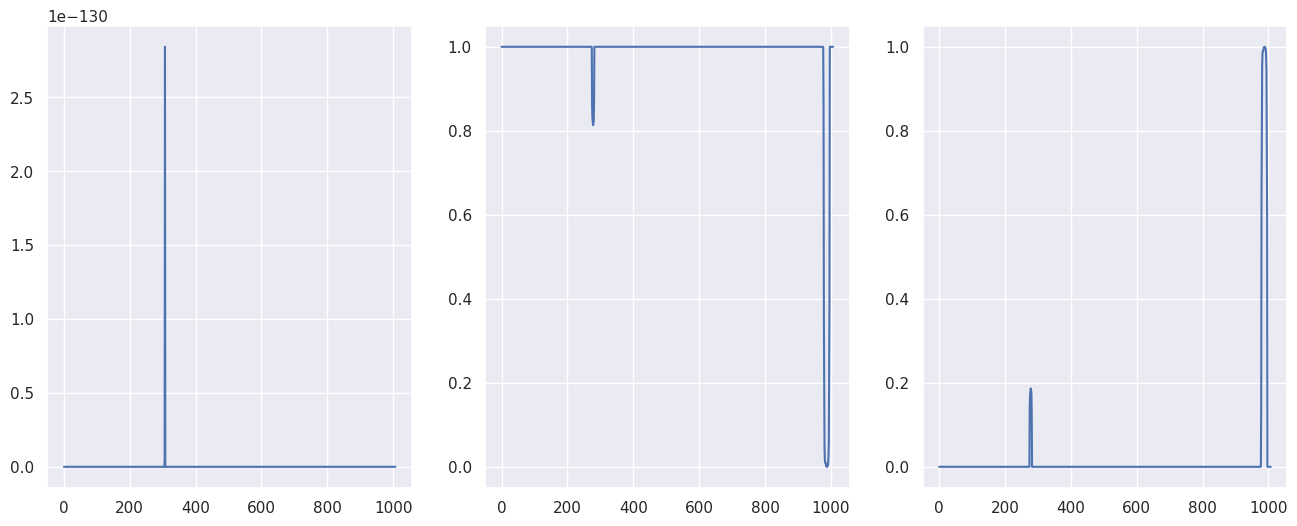

2 2175.7888162575987
[4.50659045 4.84718035 4.99770486] [0.00084315 0.07636538 0.00784145] [[0.00000000e+000 1.00000000e+000 0.00000000e+000]
 [2.92237267e-133 9.98785804e-001 1.21419594e-003]
 [0.00000000e+000 6.68524525e-002 9.33147547e-001]] [0. 1. 0.]


In [ ]:


# Initialize parameters
T = len(YData)
N = 3

# SET INITIAL GUESSES
mu_hat0 = np.array([2, 4, 6])
sigma_hat0 = np.array([0.1, 0.1, 0.1])
P_hat0 = np.array([[0.75, 0.15, 0.1], [0.2, 0.7, 0.1], [0.1, 0.1, 0.8]])
pi_hat0 = np.array([0.33, 0.33, 0.33])
for t in range(1, 100):
    pi_hat0 = np.dot(P_hat0.T, pi_hat0)

# Determine maximum number of iterations until convergence and convergence tolerance
itemax = 200
itetol = 1e-2

for ite in range(itemax):
    print(mu_hat0, sigma_hat0, P_hat0, pi_hat0)

    # E-step
    xi_prob_t, xi_prob_t1 = forward_alg(pi_hat0, N, T, P_hat0, mu_hat0, sigma_hat0, YData)
    xi_prob_T = backward_alg(xi_prob_t, xi_prob_t1, N, T, P_hat0, mu_hat0, sigma_hat0, YData)

    # Plot intermediate probabilities
    plt.figure(figsize=(16, 6))
    for i in range(N):
        plt.subplot(1, N, i + 1)
        plt.plot(xi_prob_T[:, i])
    plt.show()

    # Compute Pr(s_t+1 = j, s_t = i)
    P_hat_T = np.zeros((N, N, T))
    for tt in range(1, T):
        for ss in range(N):
            for ss2 in range(N):
                P_hat_T[ss, ss2, tt] = (
                    P_hat0[ss, ss2]
                    * xi_prob_t[tt - 1, ss]
                    * xi_prob_T[tt, ss2]
                    / xi_prob_t1[tt - 1, ss2]
                )

    # M-step
    mu_hat1, sigma_hat1, P_hat1, pi_hat1 = M_step_func(xi_prob_T, P_hat_T, N, T, YData)

    diff = np.zeros(4)
    diff[0] = np.sum(np.absolute(mu_hat1 - mu_hat0)) / (np.min(mu_hat0) + itetol * 1e-2)
    diff[1] = np.sum(np.absolute(sigma_hat1 - sigma_hat0)) / (np.min(sigma_hat0) + itetol * 1e-2)
    diff[2] = np.sum(np.absolute(P_hat1 - P_hat0)) / (np.min(P_hat0) + itetol * 1e-2)
    diff[3] = np.sum(np.absolute(pi_hat1 - pi_hat0)) / (np.min(pi_hat0) + itetol * 1e-2)

    print(ite, np.max(diff))

    if np.max(diff) > itetol:
        mu_hat0, sigma_hat0, P_hat0, pi_hat0 = mu_hat1, sigma_hat1, P_hat1, pi_hat1
    else:
        print(mu_hat1, sigma_hat1, P_hat1, pi_hat1)
        break


###  Model Fitting with Different Expectations and Variances
Below, we Fit a Markov Regime-Switching model to identify regimes with different expectations and variances using the Bitcoin data

In [ ]:
from scipy.stats import norm

# Estimation of model with changes in volatility regimes

# Build function that performs the E step
# Likelihood of an observation
def likelihood(xi_prob, mu, sigma, y):
    phi = norm.pdf((y - mu) / sigma)
    y_like = np.dot(xi_prob, phi)
    return y_like

# Hamilton filtering
def forward_alg(pi_hat0, N, T, P, mu, sigma, Y):
    xi_prob_t = np.zeros((T, N))
    xi_prob_t1 = np.zeros((T, N))

    # Case t=1
    y_like = likelihood(pi_hat0, mu, sigma, Y[0])
    for ss in range(0, N):
        phi = np.zeros((N))
        for ss2 in range(0, N):
            phi[ss2] = norm.pdf((Y[0] - mu[ss2]) / sigma[ss2])
    xi_prob_t[0, :] = np.multiply(pi_hat0, phi) / y_like
    for ss in range(0, N):
        xi_prob_t1[0, ss] = np.dot(P[:, ss], xi_prob_t[0, :])

    for tt in range(1, T):
        y_like = likelihood(xi_prob_t1[tt - 1, :], mu, sigma, Y[tt])
        for ss in range(0, N):
            phi = np.zeros((N))
            for ss2 in range(0, N):
                phi[ss2] = norm.pdf((Y[tt] - mu[ss2]) / sigma[ss2])
        xi_prob_t[tt, :] = np.multiply(xi_prob_t1[tt - 1, :], phi) / y_like
        for ss in range(0, N):
            xi_prob_t1[tt, ss] = np.dot(P[:, ss], xi_prob_t[tt, :])

    return xi_prob_t, xi_prob_t1

# Kim filtering
def backward_alg(xi_prob_t, xi_prob_t1, N, T, P, mu, sigma, Y):
    xi_prob_T = np.zeros((T, N))
    xi_prob_T[T - 1, :] = xi_prob_t[T - 1, :]

    for tt in range(T - 2, -1, -1):
        xi_T_xi = np.divide(xi_prob_T[tt + 1, :], xi_prob_t1[tt, :])
        for ss in range(0, N):
            xi_prob_T[tt, ss] = xi_prob_t[tt, ss] * np.dot(P[ss, :], xi_T_xi)

    return xi_prob_T

# M-step function
def M_step_func(xi_prob, P, N, T, Y):
    mu_hat = np.zeros((N))
    sigma_hat = np.zeros((N))
    P_hat = np.zeros((N, N))
    pi_hat = np.zeros((N))

    for ss in range(0, N):
        xi_y = np.dot(xi_prob[:, ss], Y)
        mu_hat[ss] = xi_y / np.sum(xi_prob[:, ss])

        xi_y_mu2 = np.dot(xi_prob[:, ss], (Y - mu_hat[ss]) ** 2)
        sigma_hat[ss] = (xi_y_mu2 / np.sum(xi_prob[:, ss])) ** 0.5

        for ss2 in range(0, N):
            P_hat[ss, ss2] = np.sum(P[ss, ss2, 1:]) / np.sum(P[ss, :, 1:])

        pi_hat[ss] = xi_prob[0, ss]

    return mu_hat, sigma_hat, P_hat, pi_hat

# Initialize parameters
T = len(bit_log_returns)
N = 2

mu_hat0 = np.array([2, 4])
sigma_hat0 = np.array([0.1, 0.1])
P_hat0 = np.array([[0.75, 0.25], [0.3, 0.7]])
pi_hat0 = np.array([0.5, 0.5])

# Determine maximum number of iterations until convergence and convergence tolerance
itemax = 200
itetol = 1e-2

for ite in range(0, itemax):
    print(mu_hat0, sigma_hat0, P_hat0, pi_hat0)

    # E-step
    xi_prob_t, xi_prob_t1 = forward_alg(pi_hat0, N, T, P_hat0, mu_hat0, sigma_hat0, bit_log_returns)
    xi_prob_T = backward_alg(xi_prob_t, xi_prob_t1, N, T, P_hat0, mu_hat0, sigma_hat0, bit_log_returns)

    plt.subplot(1, 2, 1)
    plt.plot(xi_prob_T[:, 0])
    plt.subplot(1, 2, 2)
    plt.plot(xi_prob_T[:, 1])
    fig = plt.gcf()
    fig.set_size_inches(16, 6)
    plt.show()

    # Compute Pr(s_t+1 = j, s_t = i)
    P_hat_T = np.zeros((N, N, T))
    for tt in range(1, T):
        for ss in range(0, N):
            for ss2 in range(0, N):
                P_hat_T[ss, ss2, tt] = (
                    P_hat0[ss, ss2]
                    * xi_prob_t[tt - 1, ss]
                    * xi_prob_T[tt, ss2]
                    / xi_prob_t1[tt - 1, ss2]
                )

    # M-step
    mu_hat1, sigma_hat1, P_hat1, pi_hat1 = M_step_func(xi_prob_T, P_hat_T, N, T, bit_log_returns)

    diff = np.zeros((4))
    diff[0] = np.sum(np.absolute(mu_hat1 - mu_hat0)) / (np.min(mu_hat0) + itetol * 1e-2)
    diff[1] = np.sum(np.absolute(sigma_hat1 - sigma_hat0)) / (
        np.min(sigma_hat0) + itetol * 1e-2
    )
    diff[2] = np.sum(np.absolute(np.subtract(P_hat1, P_hat0))) / (
        np.min(P_hat0) + itetol * 1e-2
    )
    diff[3] = np.sum(np.absolute(pi_hat1 - pi_hat0)) / (np.min(pi_hat0) + itetol * 1e-2)

    print(ite, np.max(diff))

    if np.max(diff) > itetol:
        mu_hat0, sigma_hat0, P_hat0, pi_hat0 = mu_hat1, sigma_hat1, P_hat1, pi_hat1
    else:
        print(mu_hat1, sigma_hat1, P_hat1, pi_hat1)
        break


## Number of states = 3

In [ ]:


# Initialize parameters
T = len(bit_log_returns)
N = 3

# SET INITIAL GUESSES
mu_hat0 = np.array([2, 4, 6])
sigma_hat0 = np.array([0.1, 0.1, 0.1])
P_hat0 = np.array([[0.75, 0.15, 0.1], [0.2, 0.7, 0.1], [0.1, 0.1, 0.8]])
pi_hat0 = np.array([0.33, 0.33, 0.33])
for t in range(1, 100):
    pi_hat0 = np.dot(P_hat0.T, pi_hat0)

# Determine maximum number of iterations until convergence and convergence tolerance
itemax = 200
itetol = 1e-2

for ite in range(itemax):
    print(mu_hat0, sigma_hat0, P_hat0, pi_hat0)

    # E-step
    xi_prob_t, xi_prob_t1 = forward_alg(pi_hat0, N, T, P_hat0, mu_hat0, sigma_hat0, bit_log_returns)
    xi_prob_T = backward_alg(xi_prob_t, xi_prob_t1, N, T, P_hat0, mu_hat0, sigma_hat0, bit_log_returns)

    # Plot intermediate probabilities
    plt.figure(figsize=(16, 6))
    for i in range(N):
        plt.subplot(1, N, i + 1)
        plt.plot(xi_prob_T[:, i])
    plt.show()

    # Compute Pr(s_t+1 = j, s_t = i)
    P_hat_T = np.zeros((N, N, T))
    for tt in range(1, T):
        for ss in range(N):
            for ss2 in range(N):
                P_hat_T[ss, ss2, tt] = (
                    P_hat0[ss, ss2]
                    * xi_prob_t[tt - 1, ss]
                    * xi_prob_T[tt, ss2]
                    / xi_prob_t1[tt - 1, ss2]
                )

    # M-step
    mu_hat1, sigma_hat1, P_hat1, pi_hat1 = M_step_func(xi_prob_T, P_hat_T, N, T, bit_log_returns)

    diff = np.zeros(4)
    diff[0] = np.sum(np.absolute(mu_hat1 - mu_hat0)) / (np.min(mu_hat0) + itetol * 1e-2)
    diff[1] = np.sum(np.absolute(sigma_hat1 - sigma_hat0)) / (np.min(sigma_hat0) + itetol * 1e-2)
    diff[2] = np.sum(np.absolute(P_hat1 - P_hat0)) / (np.min(P_hat0) + itetol * 1e-2)
    diff[3] = np.sum(np.absolute(pi_hat1 - pi_hat0)) / (np.min(pi_hat0) + itetol * 1e-2)

    print(ite, np.max(diff))

    if np.max(diff) > itetol:
        mu_hat0, sigma_hat0, P_hat0, pi_hat0 = mu_hat1, sigma_hat1, P_hat1, pi_hat1
    else:
        print(mu_hat1, sigma_hat1, P_hat1, pi_hat1)
        break


# Step 4

In [ ]:
# Defining both methods


def tauchen_method(RHO, SIGMA, LAMBDA, N_GRID):
    start_tauchen = -LAMBDA * SIGMA / (1 - RHO**2) ** 0.5
    end_tauchen = -start_tauchen
    zgrid_tauchen = np.linspace(start_tauchen, end_tauchen, N_GRID)
    zmid_points = (zgrid_tauchen[1:] + zgrid_tauchen[:-1]) / 2
    P_tauchen = np.zeros((N_GRID, N_GRID))
    P_tauchen[:, 0] = norm.cdf((zmid_points[0] - RHO * zgrid_tauchen) / SIGMA)
    P_tauchen[:, -1] = 1.0 - norm.cdf((zmid_points[-1] - RHO * zgrid_tauchen) / SIGMA)
    for i in range(0, N_GRID):
        for j in range(1, N_GRID - 1):
            P_tauchen[i, j] = norm.cdf(
                (zmid_points[j] - RHO * zgrid_tauchen[i]) / SIGMA
            ) - norm.cdf((zmid_points[j - 1] - RHO * zgrid_tauchen[i]) / SIGMA)
    return P_tauchen, zgrid_tauchen


def rouwen_method(RHO, SIGMA, N_GRID):
    p_rouwen = (1 + RHO) * 0.5
    q_rouwen = p_rouwen
    start_rouwen = -(((N_GRID - 1) / (1 - RHO**2)) ** 0.5) * SIGMA
    end_rouwen = -start_rouwen
    zgrid_rouwen = np.linspace(start_rouwen, end_rouwen, N_GRID)
    P_rouwen = np.append(
        [[p_rouwen, 1.0 - p_rouwen]], [[1 - q_rouwen, q_rouwen]], axis=0
    )

    for i in range(2, N_GRID):
        m1 = np.append(P_rouwen, np.zeros((i, 1)), axis=1)
        m1 = np.append(m1, np.zeros((1, i + 1)), axis=0)
        m2 = np.append(np.zeros((i, 1)), P_rouwen, axis=1)
        m2 = np.append(m2, np.zeros((1, i + 1)), axis=0)
        m3 = np.append(P_rouwen, np.zeros((i, 1)), axis=1)
        m3 = np.append(np.zeros((1, i + 1)), m3, axis=0)
        m4 = np.append(np.zeros((i, 1)), P_rouwen, axis=1)
        m4 = np.append(np.zeros((1, i + 1)), m4, axis=0)

        P_rouwen = (
            p_rouwen * m1 + (1 - p_rouwen) * m2 + (1 - q_rouwen) * m3 + q_rouwen * m4
        )
        P_rouwen[1:i, :] = 0.5 * P_rouwen[1:i, :]

    return P_rouwen, zgrid_rouwen

In [ ]:
# Fix the parameters
RHO = 0.975
SIGMA = 0.078
N_GRID = 9
LAMBDA = 2.0  # Used in Tauchen method

P_tauchen, zgrid_tauchen = tauchen_method(RHO, SIGMA, LAMBDA, N_GRID)
P_rouwen, zgrid_rouwen = rouwen_method(RHO, SIGMA, N_GRID)

# Find the stationary distributions by iteration
p_stat_tauchen = np.ones((N_GRID, 1)) / N_GRID
p_stat_rouwen = np.ones((N_GRID, 1)) / N_GRID
for t in range(1, 100):
    p_stat_tauchen = np.dot(P_tauchen.T, p_stat_tauchen)
    p_stat_rouwen = np.dot(P_rouwen.T, p_stat_rouwen)

# Check if unconditional moments match
tauchen_mean_stat = np.dot(p_stat_tauchen.T, zgrid_tauchen) / N_GRID
tauchen_sd_stat = (
    np.dot(p_stat_tauchen.T, (zgrid_tauchen - tauchen_mean_stat) ** 2)
) ** 0.5

rouwen_mean_stat = np.dot(p_stat_rouwen.T, zgrid_rouwen) / N_GRID
rouwen_sd_stat = (
    np.dot(p_stat_rouwen.T, (zgrid_rouwen - rouwen_mean_stat) ** 2)
) ** 0.5

print(
    "Checking the unconditional mean....",
    "Tauchen Mean:",
    tauchen_mean_stat,
    "Rouwen Mean:",
    rouwen_mean_stat,
    "Mean:",
    0,
)
print(
    "Checking the unconditional sd....",
    "Tauchen sd:",
    tauchen_sd_stat,
    "Rouwen sd:",
    rouwen_sd_stat,
    "sd:",
    SIGMA / (1 - RHO**2) ** 0.5,
)

At first, it is check the parameters for tauchen and rouwen method.

In [ ]:
# Monte Carlo simulations to compare performance
# seed random number generator
seed(12345)

LEN_HIST = len(YData)

histories_tauchen_st = np.zeros((LEN_HIST), np.int8)
histories_tauchen_z = np.zeros((LEN_HIST))
histories_tauchen_st[0] = 1
histories_tauchen_z[0] = zgrid_tauchen[histories_tauchen_st[0]]

histories_rouwen_st = np.zeros((LEN_HIST), np.int8)
histories_rouwen_z = np.zeros((LEN_HIST))
histories_rouwen_st[0] = 1
histories_rouwen_z[0] = zgrid_rouwen[histories_rouwen_st[0]]

randarray = rand(LEN_HIST)

for j in range(1, LEN_HIST):
    for r in range(0, N_GRID):
        if randarray[j] < np.cumsum(P_tauchen[histories_tauchen_st[j - 1], :])[r]:
            histories_tauchen_z[j] = zgrid_tauchen[r]
            histories_tauchen_st[j] = r
            break
    for r in range(0, N_GRID):
        if randarray[j] < np.cumsum(P_rouwen[histories_rouwen_st[j - 1], :])[r]:
            histories_rouwen_z[j] = zgrid_rouwen[r]
            histories_rouwen_st[j] = r
            break

plt.subplot(1, 2, 1)
plt.plot(histories_tauchen_z[:])
plt.plot(histories_rouwen_z[:])
plt.title("Tauchen vs. Rouwenhorst")

fig = plt.gcf()
fig.set_size_inches(16, 5)
plt.show()

The plot was generated as shown above where both movements are almost close to each other.

In [ ]:
# Compute mean, variance, and autocorrelation coefficient of both series
# Exclude the initial periods (Burn-in)
T_EXCLUDE = 100
tauchen_mean = np.mean(histories_tauchen_z[T_EXCLUDE:LEN_HIST])
rouwen_mean = np.mean(histories_rouwen_z[T_EXCLUDE:LEN_HIST])

print("Real mean:", 0, "Tauchen mean:", tauchen_mean, "Rouwen mean:", rouwen_mean)

tauchen_sd = np.std(histories_tauchen_z[T_EXCLUDE:LEN_HIST])
rouwen_sd = np.std(histories_rouwen_z[T_EXCLUDE:LEN_HIST])

print(
    "Real sd:",
    SIGMA / (1 - RHO**2) ** 0.5,
    "Tauchen sd:",
    tauchen_sd,
    "Rouwen_sd:",
    rouwen_sd,
)

tauchen_cov = np.cov(
    histories_tauchen_z[T_EXCLUDE : LEN_HIST - 1],  # noQA E203
    histories_tauchen_z[T_EXCLUDE + 1 : LEN_HIST],  # noQA E203
)
rouwen_cov = np.cov(
    histories_rouwen_z[T_EXCLUDE : LEN_HIST - 1],  # noQA E203
    histories_rouwen_z[T_EXCLUDE + 1 : LEN_HIST],  # noQA E203
)

tauchen_rho = tauchen_cov[0, 1] / tauchen_cov[0, 0]
rouwen_rho = rouwen_cov[0, 1] / rouwen_cov[0, 0]

print("Real rho:", RHO, "Tauchen rho:", tauchen_rho, "Rouwen rho:", rouwen_rho)

Although there is a slight difference with the mean value from both methods, it still closes to zero. This scenario can describe that rouwenhorst method has slightly biased compared Tauchen method. Regarding the standard deviation, both methods have a close value with the real standard deviation.
The autocorrelation of the real value is 0.975, and the method of Tauchen and Rouwenhorst are 0.96 and 0.97, respectively which close enough to the real value. Thus, both methods can be applied to neutralize the biases and error.
